In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import decomposition
from sklearn.cluster import KMeans 

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv("NEW-DATA-3.T15.txt", sep=' ')

In [3]:
df

,1:Date,2:Time,3:Temperature_Comedor_Sensor,4:Temperature_Habitacion_Sensor,5:Weather_Temperature,6:CO2_Comedor_Sensor,7:CO2_Habitacion_Sensor,8:Humedad_Comedor_Sensor,9:Humedad_Habitacion_Sensor,10:Lighting_Comedor_Sensor,...,15:Meteo_Exterior_Sol_Oest,16:Meteo_Exterior_Sol_Est,17:Meteo_Exterior_Sol_Sud,18:Meteo_Exterior_Piranometro,19:Exterior_Entalpic_1,20:Exterior_Entalpic_2,21:Exterior_Entalpic_turbo,22:Temperature_Exterior_Sensor,23:Humedad_Exterior_Sensor,24:Day_Of_Week
0,18/04/2012,00:00,20.2000,19.8000,13.0000,207.840,206.560,31.5800,30.1600,11.7200,...,0.00,0.00,0.000,-3.12000,0,0,0,16.0700,39.0800,3.0
1,18/04/2012,00:15,20.1593,19.7600,13.0000,207.499,206.101,31.6240,30.0613,11.5240,...,0.00,0.00,0.000,-2.80800,0,0,0,16.0400,38.9680,3.0
2,18/04/2012,00:30,20.0740,19.6580,13.0000,207.360,206.805,31.6507,30.1773,11.6220,...,0.00,0.00,0.000,-2.96400,0,0,0,16.0160,38.9467,3.0
3,18/04/2012,00:45,19.9773,19.5833,13.0000,207.445,206.325,31.6987,30.2560,11.7847,...,0.00,0.00,0.000,-3.02933,0,0,0,15.9427,39.0760,3.0
4,18/04/2012,01:00,19.8933,19.5000,13.0000,207.840,205.952,31.7707,30.3840,11.5887,...,0.00,0.00,0.000,-2.88600,0,0,0,15.8627,40.0413,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,11/04/2012,05:30,21.1520,20.8187,13.0000,190.539,192.181,41.3120,41.6880,11.4427,...,0.00,0.00,0.000,-3.43400,0,0,0,16.6180,49.2960,3.0
4133,11/04/2012,05:45,21.0413,20.7053,12.1333,190.421,193.067,41.3173,41.7200,11.6867,...,465.92,2716.67,523.264,3.85200,0,0,0,16.4013,50.0373,3.0
4134,11/04/2012,06:00,20.9347,20.5827,12.0000,190.432,193.653,41.3333,41.7573,19.5387,...,3454.98,16203.80,3347.460,26.83000,0,0,0,16.2607,50.0587,3.0
4135,11/04/2012,06:15,20.8560,20.5200,12.0000,191.531,193.387,41.3093,41.8107,20.9853,...,6795.26,38303.10,7110.660,66.94930,0,0,0,16.2367,49.8400,3.0


In [4]:
df=df.rename(columns={"3:Temperature_Comedor_Sensor":"3:Temperature_Dinning_Sensor",
                   "4:Temperature_Habitacion_Sensor": "4:Temperature_Room_Sensor",
                  "6:CO2_Comedor_Sensor": "6:CO2_Dinning_Sensor",
                  "7:CO2_Habitacion_Sensor":"7:CO2_Room_Sensor",
                  "8:Humedad_Comedor_Sensor":"8:Humid_Dinning_Sensor",
                  "9:Humedad_Habitacion_Sensor":"9:Humid_Room_Sensor",
                  "10:Lighting_Comedor_Sensor":"10:Lighting_Dinning_Sensor",
                  "11:Lighting_Habitacion_Sensor":"11:Lighting_Room_Sensor",
                  "13:Meteo_Exterior_Crepusculo":"13:Sun_Dusk",
                  "14:Meteo_Exterior_Viento":"14:Win",
                  "15:Meteo_Exterior_Sol_Oest":"15:Sunlight_West",
                  "16:Meteo_Exterior_Sol_Est":"16:Sunlight_East",
                   "17:Meteo_Exterior_Sol_Sud":"17:Sunlight_South",
                   "18:Meteo_Exterior_Piranometro":"18:Sun_Irradiance",
                "23:Humedad_Exterior_Sensor":"23:Humid_Exterior_Sensor"})

In [5]:
target = df['5:Weather_Temperature']
x = df.drop(['1:Date','2:Time','6:CO2_Dinning_Sensor','7:CO2_Room_Sensor','12:Precipitacion','15:Sunlight_West',
             '16:Sunlight_East','19:Exterior_Entalpic_1','20:Exterior_Entalpic_2','21:Exterior_Entalpic_turbo','24:Day_Of_Week'], axis=1)
#After this we are reduced to x 14 columns and y to one

In [6]:
#Normalization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)#Normalising data
data_trans = scaler.transform(x)#Filling in the dataframe
final_df= pd.DataFrame(data_trans,columns=x.columns)#constructing a data frame
y=final_df['5:Weather_Temperature']
X_std = final_df.drop(['5:Weather_Temperature'], axis=1)

In [7]:
X_std

,3:Temperature_Dinning_Sensor,4:Temperature_Room_Sensor,8:Humid_Dinning_Sensor,9:Humid_Room_Sensor,10:Lighting_Dinning_Sensor,11:Lighting_Room_Sensor,13:Sun_Dusk,14:Win,17:Sunlight_South,18:Sun_Irradiance,22:Temperature_Exterior_Sensor,23:Humid_Exterior_Sensor
0,-0.088634,-0.104528,-1.498348,-1.734006,-0.671706,-0.661437,-1.098425,-1.066147,-0.673330,-0.753221,-0.454949,-1.049018
1,-0.100924,-0.116610,-1.492249,-1.745903,-0.679338,-0.647351,-1.098425,-1.066147,-0.673330,-0.752223,-0.461951,-1.057308
2,-0.126681,-0.147420,-1.488548,-1.731921,-0.675522,-0.642781,-1.098425,-0.994232,-0.673330,-0.752722,-0.467552,-1.058885
3,-0.155881,-0.169984,-1.481895,-1.722435,-0.669187,-0.640496,-1.098425,-0.962089,-0.673330,-0.752931,-0.484659,-1.049314
4,-0.181245,-0.195146,-1.471915,-1.707007,-0.676819,-0.636677,-1.098425,-1.066147,-0.673330,-0.752472,-0.503330,-0.977860
...,...,...,...,...,...,...,...,...,...,...,...,...
4132,0.198832,0.203181,-0.149404,-0.344494,-0.682504,-0.690077,0.188877,-1.005128,-0.673330,-0.754226,-0.327053,-0.292805
4133,0.165405,0.168927,-0.148669,-0.340637,-0.673003,-0.540303,0.913128,-1.066147,-0.655586,-0.730905,-0.377628,-0.237932
4134,0.133216,0.131895,-0.146452,-0.336141,-0.367254,-0.448215,0.915371,-0.812267,-0.559822,-0.657358,-0.410442,-0.236348
4135,0.109451,0.112955,-0.149778,-0.329704,-0.310925,-0.443583,0.920626,-0.821530,-0.432217,-0.528944,-0.416043,-0.252537


([<matplotlib.axis.XTick at 0x19b6ffd17c8>,
 <a list of 12 Text major ticklabel objects>)

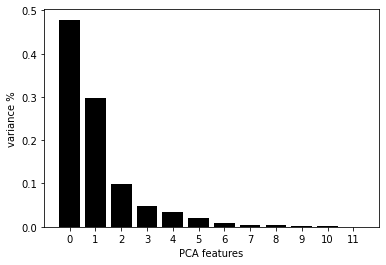

In [22]:
pca = decomposition.PCA(n_components=12)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

,Principal Component 1,Principal Component 2
0,-0.599026,-2.285854
1,-0.601243,-2.277019
2,-0.596631,-2.245176
3,-0.609502,-2.212219
4,-0.689291,-2.170480


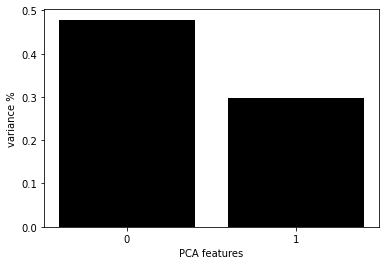

In [9]:
pca = decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
PCA_components.head()

In [10]:
x = PCA_components.iloc[:, [0,1]].values

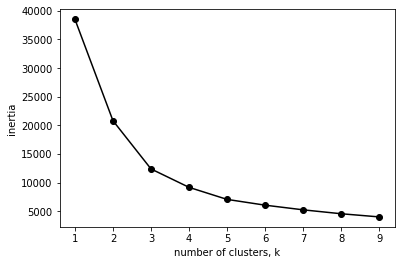

In [11]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [12]:
k_means3 = KMeans(n_clusters=3)
yk_means3 = k_means3.fit_predict(x)
print(yk_means3)
k_means3.cluster_centers_

[2 2 2 ... 2 2 2]


array([[ 2.92476231,  1.7220784 ],
       [-2.07109034,  0.38588788],
       [ 0.61257046, -2.07025215]])

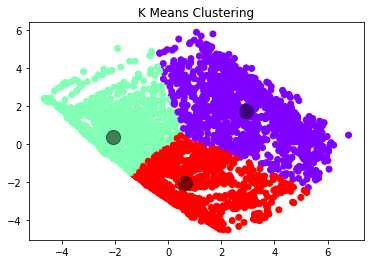

In [25]:
X = plt.scatter(x[:, 0], x[:, 1], c=yk_means3, cmap='rainbow')
centers = k_means3.cluster_centers_
plt.title("K Means Clustering")
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

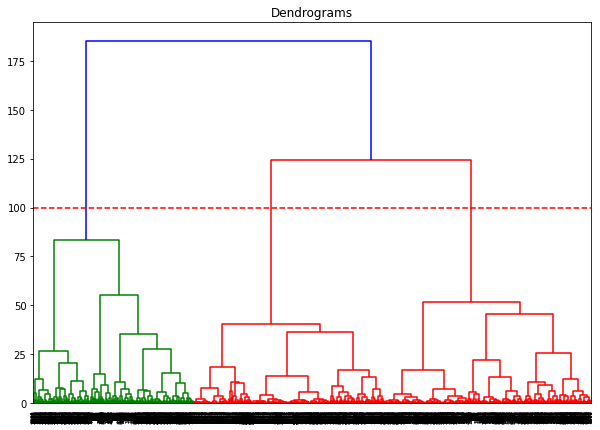

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.axhline(y=100, color='r', linestyle='--')
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
cluster.fit_predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
y_pred_agg = cluster.labels_
print(cluster.labels_)

[0 0 0 ... 0 0 0]


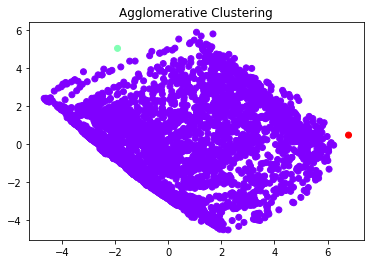

In [24]:
plt.title("Agglomerative Clustering")
plt.scatter(x[:,0],x[:,1], c=cluster.labels_, cmap='rainbow')

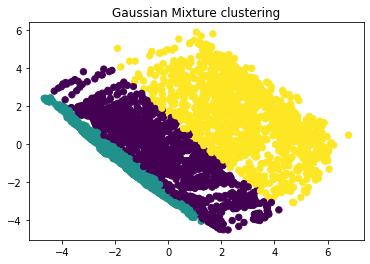

In [26]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3,covariance_type='full')
gmm.fit(x)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(x)
y_cluster_gmm
plt.title("Gaussian Mixture clustering")
plt.scatter(x[:, 0], x[:, 1], c=y_cluster_gmm, s=40, cmap='viridis');

In [19]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, x, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(x).predict(x)
    if label:
        ax.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(x[:, 0], x[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    return labels

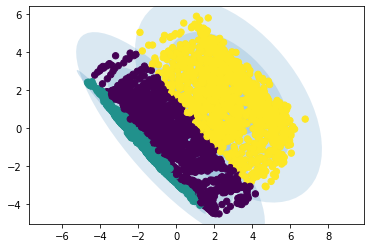

In [20]:
gmm = GaussianMixture(n_components=3, random_state=42)
y_pred=plot_gmm(gmm, x)